# **Interview Summary Notebook: Building an AI-powered HR Sidekick** 🤖
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/video-db/videodb-cookbook/blob/main/meeting_agent/Interview_Evaluation_To_Slack.ipynb)

Imagine you're Kate, an HR wizard at REI. You're constantly juggling candidate interviews — evaluating skills, understanding personalities, and taking diligent notes. But after the fourth Zoom call of the day, faces blur, notes pile up, and remembering who said what becomes a herculean task.

Enter VideoDB: your AI-powered sidekick that listens, remembers, and summarizes better than any human ever could. By recording interviews, analyzing transcripts, and auto-generating rich feedback, Kate can focus on truly connecting with candidates — leaving the note-taking to her digital assistant.

In this notebook, we’ll build a smart workflow that records an interview, analyzes the candidate’s responses, and instantly sends a detailed evaluation to your Slack workspace. Buckle up, we're about to transform HR interviews into an effortless, futuristic experience!


### Install dependencies

In [1]:
!pip -q install videodb

  Preparing metadata (setup.py) ... done


### Connect to videodb

In [2]:
import os
from getpass import getpass

videodb_api_key = getpass("Please enter your VideoDB API Key: ")

os.environ["VIDEO_DB_API_KEY"] = videodb_api_key

Please enter your VideoDB API Key: ··········


In [3]:
from videodb import connect
conn = connect()

### Create a new collection for the meeting recordings (skip if already created)

In [ ]:
# coll = conn.create_collection(name ="Meeting Recorder", description = "This collection stores videos related to Meeting Recording Agent.")
# print(coll)

#### If collection already created, simply connect to it using the id.

In [4]:
coll = conn.get_collection("c-6df474d9-3d39-419c-8d8e-604ab9c163db")
print(coll)

Collection(id=c-6df474d9-3d39-419c-8d8e-604ab9c163db, name=Meeting Recorder, description=This collection stores videos related to Meeting Recording Agent.), is_public=False)


## Record the Interview with Your Silent AI Buddy 🎥🤫

Here’s the magic: with one function call, your AI sidekick silently joins a meeting link, records the entire interview, and neatly stores it in your VideoDB collection.  

This means you can stay fully present — no frantic scribbling, no worrying about missing that one key detail. The recording lives safely in your collection, ready to be indexed and analyzed at your command.  


In [ ]:
meeting = coll.record_meeting(
    meeting_url="https://meet.google.com/vai-pfyz-fjr",
    bot_name="VideoDB Interview Bot",
    meeting_name="HR Interview",
    callback_url="https://a1b2c3d4e5f6g7h8i9j0k1l2m3n4o5p6.m.pipedream.net",
)

### For the usecase demo, we have used a youtube video using the following snippet.

In [ ]:
# meeting_video = coll.upload(url="https://www.youtube.com/watch?v=4ostqJD3Psc")

## Real-time Updates from the Recording Bot 💬⚡

As the meeting progresses, your bot can send live updates to a callback URL, letting you track progress in real time.  

If you’ve already recorded a session before, you can simply retrieve the video using its ID and jump straight into analysis mode.  


In [85]:
# meeting_video = coll.get_video(video_id=meeting.video_id)
# print(meeting_video)

Video(id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, collection_id=c-6df474d9-3d39-419c-8d8e-604ab9c163db, stream_url=https://dseetlpshk2tb.cloudfront.net/v3/published/manifests/e9409115-3d87-423c-84ba-de5da46a0895.m3u8, player_url=https://console.dev.videodb.io/player?url=https://dseetlpshk2tb.cloudfront.net/v3/published/manifests/e9409115-3d87-423c-84ba-de5da46a0895.m3u8, name=Job Interview Example, description=None, thumbnail_url=None, length=820.987937)


## Index the Interview: Turning Speech into Actionable Data 🗣️🧠

Once the recording is complete, it's time to transcribe and index every spoken word.  

VideoDB’s indexing automatically breaks down the conversation, capturing each word’s exact timestamp and speaker label. This creates a rich, searchable transcript — a goldmine of insights waiting to be mined.


In [ ]:
meeting_video.index_spoken_words()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.73it/s]


In [86]:
text_json = meeting_video.get_transcript()
print(text_json)

[{'end': 0.56, 'start': 0.0, 'text': '-'}, {'end': 0.8, 'speaker': 'A', 'start': 0.56, 'text': 'Hi.'}, {'end': 1.08, 'speaker': 'B', 'start': 0.8, 'text': 'Chris'}, {'end': 1.56, 'speaker': 'B', 'start': 1.08, 'text': 'Sauer.'}, {'end': 1.84, 'speaker': 'A', 'start': 1.56, 'text': 'Hi.'}, {'end': 2.08, 'speaker': 'C', 'start': 1.84, 'text': 'Kate'}, {'end': 2.48, 'speaker': 'C', 'start': 2.08, 'text': 'Johnson.'}, {'end': 2.72, 'speaker': 'C', 'start': 2.48, 'text': 'Nice'}, {'end': 2.8, 'speaker': 'C', 'start': 2.72, 'text': 'to'}, {'end': 2.88, 'speaker': 'C', 'start': 2.8, 'text': 'meet'}, {'end': 3.08, 'speaker': 'C', 'start': 2.88, 'text': 'you.'}, {'end': 3.36, 'speaker': 'B', 'start': 3.08, 'text': 'Nice'}, {'end': 3.44, 'speaker': 'B', 'start': 3.36, 'text': 'to'}, {'end': 3.52, 'speaker': 'B', 'start': 3.44, 'text': 'meet'}, {'end': 3.64, 'speaker': 'B', 'start': 3.52, 'text': 'you,'}, {'end': 4.0, 'speaker': 'B', 'start': 3.64, 'text': 'Kate.'}, {'end': 4.48, 'start': 4.0, 't

### The meeting recorder stores a speaker timeline that indicates the exact timestamps when any speaker starts talking.

In [ ]:
# speaker_timeline = meeting.speaker_timeline
# print(speaker_timeline)

### For the usecase, we will sue the smaple timeline.

In [104]:
speaker_timeline = [{"speaker_name": "Chris", "start_time_seconds": "0.56"}, {"speaker_name": "Kate", "start_time_seconds": "1.84"}, {"speaker_name": "Chris", "start_time_seconds": "3.08"}, {"speaker_name": "Kate", "start_time_seconds": "4.48"}, {"speaker_name": "Chris", "start_time_seconds": "6.88"}, {"speaker_name": "Kate", "start_time_seconds": "20.0"}, {"speaker_name": "Chris", "start_time_seconds": "21.2"}, {"speaker_name": "Kate", "start_time_seconds": "25.76"}, {"speaker_name": "Chris", "start_time_seconds": "34.06"}, {"speaker_name": "Kate", "start_time_seconds": "69.91"}, {"speaker_name": "Chris", "start_time_seconds": "80.23"}, {"speaker_name": "Kate", "start_time_seconds": "111.23"}, {"speaker_name": "Chris", "start_time_seconds": "116.51"}, {"speaker_name": "Kate", "start_time_seconds": "140.05"}, {"speaker_name": "Chris", "start_time_seconds": "146.41"}, {"speaker_name": "Kate", "start_time_seconds": "165.51"}, {"speaker_name": "Chris", "start_time_seconds": "173.35"}, {"speaker_name": "Kate", "start_time_seconds": "203.3"}, {"speaker_name": "Chris", "start_time_seconds": "230.93"}, {"speaker_name": "Kate", "start_time_seconds": "271.95"}, {"speaker_name": "Chris", "start_time_seconds": "279.61"}, {"speaker_name": "Kate", "start_time_seconds": "294.01"}, {"speaker_name": "Chris", "start_time_seconds": "299.85"}, {"speaker_name": "Kate", "start_time_seconds": "331.82"}, {"speaker_name": "Chris", "start_time_seconds": "338.06"}, {"speaker_name": "Kate", "start_time_seconds": "356.46"}, {"speaker_name": "Chris", "start_time_seconds": "364.19"}, {"speaker_name": "Kate", "start_time_seconds": "406.59"}, {"speaker_name": "Chris", "start_time_seconds": "426.18"}, {"speaker_name": "Kate", "start_time_seconds": "451.32"}, {"speaker_name": "Chris", "start_time_seconds": "455.96"}, {"speaker_name": "Kate", "start_time_seconds": "470.76"}, {"speaker_name": "Chris", "start_time_seconds": "477.54"}, {"speaker_name": "Kate", "start_time_seconds": "499.3"}, {"speaker_name": "Chris", "start_time_seconds": "525.27"}, {"speaker_name": "Kate", "start_time_seconds": "556.29"}, {"speaker_name": "Chris", "start_time_seconds": "566.43"}, {"speaker_name": "Kate", "start_time_seconds": "599.54"}, {"speaker_name": "Chris", "start_time_seconds": "622.67"}, {"speaker_name": "Kate", "start_time_seconds": "646.43"}, {"speaker_name": "Chris", "start_time_seconds": "652.77"}, {"speaker_name": "Kate", "start_time_seconds": "695.87"}, {"speaker_name": "Chris", "start_time_seconds": "700.67"}, {"speaker_name": "Kate", "start_time_seconds": "716.33"}, {"speaker_name": "Chris", "start_time_seconds": "768.44"}, {"speaker_name": "Kate", "start_time_seconds": "774.98"}, {"speaker_name": "Chris", "start_time_seconds": "815.65"}, {"speaker_name": "Kate", "start_time_seconds": "817.25"}]


## Convert Words into Readable Conversations 💬📝
Raw transcripts can be messy — hundreds of single-word entries that aren’t easy to follow.

This utility function takes those scattered words and stitches them into clear, speaker-wise sentences. By transforming transcripts into an actual readable conversation, we make it much easier to analyze and share insights later.

In [93]:
import json

def format_conversation(word_data):
    if not word_data:
        return []

    formatted_conversation = []

    current_speaker = None
    current_sentence_words = []
    current_sentence_begin = None
    current_sentence_end = None

    for entry in word_data:
        if 'speaker' not in entry:
            continue

        speaker = entry['speaker']
        word_text = entry.get('text', '')
        word_begin = entry.get('start')
        word_end = entry.get('end')

        if current_speaker is None or speaker != current_speaker:
            if current_speaker is not None and current_sentence_words:
                full_sentence_text = " ".join(current_sentence_words)
                formatted_conversation.append({
                    "speaker": current_speaker,
                    "start": current_sentence_begin,
                    "end": current_sentence_end,
                    "text": full_sentence_text
                })

            current_speaker = speaker
            current_sentence_words = [word_text]
            current_sentence_begin = word_begin
            current_sentence_end = word_end
        else:

            current_sentence_words.append(word_text)
            current_sentence_end = word_end

    if current_speaker is not None and current_sentence_words:
        full_sentence_text = " ".join(current_sentence_words)
        formatted_conversation.append({
            "speaker": current_speaker,
            "start": current_sentence_begin,
            "end": current_sentence_end,
            "text": full_sentence_text
        })

    return formatted_conversation

In [94]:
formatted_transcript= format_conversation(text_json)
print(json.dumps(formatted_transcript, indent=2))

[
  {
    "speaker": "A",
    "start": 0.56,
    "end": 0.8,
    "text": "Hi."
  },
  {
    "speaker": "B",
    "start": 0.8,
    "end": 1.56,
    "text": "Chris Sauer."
  },
  {
    "speaker": "A",
    "start": 1.56,
    "end": 1.84,
    "text": "Hi."
  },
  {
    "speaker": "C",
    "start": 1.84,
    "end": 3.08,
    "text": "Kate Johnson. Nice to meet you."
  },
  {
    "speaker": "B",
    "start": 3.08,
    "end": 4.0,
    "text": "Nice to meet you, Kate."
  },
  {
    "speaker": "C",
    "start": 4.48,
    "end": 6.88,
    "text": "Chris, please tell me a little bit about yourself."
  },
  {
    "speaker": "B",
    "start": 6.88,
    "end": 18.08,
    "text": "Well, I'm currently finishing my master's of education program at Lake Erie College and working on transitioning from a northeastern Ohioaner to being a member of the Jacksonville area community."
  },
  {
    "speaker": "C",
    "start": 20.0,
    "end": 20.72,
    "text": "Why the move?"
  },
  {
    "speaker": "B",
    "

#### 👤 Assign Real Names to Speakers  
Map speaker labels like "A" or "B" to actual names based on timeline metadata.


In [119]:
import json

def assign_speakers_to_transcript(speaker_timeline, transcript):

    if not transcript:
        return []

    processed_timeline = []
    for entry in speaker_timeline:
        speaker_name = entry.get("speaker_name")
        start_time_str = entry.get("start_time_seconds")

        if speaker_name and speaker_name != "Unknown Speaker" and start_time_str is not None:
            try:
                processed_timeline.append({
                    "start_time": float(start_time_str),
                    "speaker_name": speaker_name
                })
            except ValueError:

                pass

    processed_timeline.sort(key=lambda x: x["start_time"])

    updated_transcript = []

    current_assigned_speaker = "Unknown Speaker"
    timeline_idx = 0

    for segment in transcript:
        segment_begin_time = segment.get("start")

        if not isinstance(segment_begin_time, (int, float)):

            updated_transcript.append(segment.copy())
            continue
        while timeline_idx < len(processed_timeline) and \
              processed_timeline[timeline_idx]["start_time"] <= segment_begin_time:

            current_assigned_speaker = processed_timeline[timeline_idx]["speaker_name"]
            timeline_idx += 1

        new_segment = segment.copy()
        new_segment["speaker"] = current_assigned_speaker
        updated_transcript.append(new_segment)

    return updated_transcript

In [120]:
named_transcript = assign_speakers_to_transcript(speaker_timeline,formatted_transcript)
print(json.dumps(named_transcript, indent=2))

[
  {
    "speaker": "Chris",
    "start": 0.56,
    "end": 0.8,
    "text": "Hi."
  },
  {
    "speaker": "Chris",
    "start": 0.8,
    "end": 1.56,
    "text": "Chris Sauer."
  },
  {
    "speaker": "Chris",
    "start": 1.56,
    "end": 1.84,
    "text": "Hi."
  },
  {
    "speaker": "Kate",
    "start": 1.84,
    "end": 3.08,
    "text": "Kate Johnson. Nice to meet you."
  },
  {
    "speaker": "Chris",
    "start": 3.08,
    "end": 4.0,
    "text": "Nice to meet you, Kate."
  },
  {
    "speaker": "Kate",
    "start": 4.48,
    "end": 6.88,
    "text": "Chris, please tell me a little bit about yourself."
  },
  {
    "speaker": "Chris",
    "start": 6.88,
    "end": 18.08,
    "text": "Well, I'm currently finishing my master's of education program at Lake Erie College and working on transitioning from a northeastern Ohioaner to being a member of the Jacksonville area community."
  },
  {
    "speaker": "Kate",
    "start": 20.0,
    "end": 20.72,
    "text": "Why the move?"
  },


### Let us create custom scenes based on our transcript and metadata

In [121]:
from videodb.scene import Scene

scenes_with_metadata = []

for segment in named_transcript:
    scene = Scene(
        video_id=meeting_video.id,
        start=segment.get('start', 0.0),
        end=segment.get('end', 0.0),
        description=segment.get('text', ''),
        metadata={"speaker": segment.get('speaker', 'Unknown')}
    )
    scenes_with_metadata.append(scene)

In [156]:
print(scenes_with_metadata)

[Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=0.56, end=0.8, frames=[], description=Hi.), metadata={'speaker': 'Chris'}), Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=0.8, end=1.56, frames=[], description=Chris Sauer.), metadata={'speaker': 'Chris'}), Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=1.56, end=1.84, frames=[], description=Hi.), metadata={'speaker': 'Chris'}), Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=1.84, end=3.08, frames=[], description=Kate Johnson. Nice to meet you.), metadata={'speaker': 'Kate'}), Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=3.08, end=4.0, frames=[], description=Nice to meet you, Kate.), metadata={'speaker': 'Chris'}), Scene(id=None, video_id=m-z-0197e459-da47-7532-95ec-6dfa1c03925c, start=4.48, end=6.88, frames=[], description=Chris, please tell me a little bit about yourself.), metadata={'speaker': 'Kate'}), Scene(

#### 🧩 Index Scenes with Metadata  
Create scene segments enriched with transcript and speaker data — perfect for search & summarization.


In [157]:
scene_index_id = meeting_video.index_scenes(
    scenes=scenes_with_metadata,
    name="Scene indexing with speaker metadata and transcript"
)
print(scene_index_id)

6400be8bb881c791


#### 🔍 Find Key Interview Moments  
Ask your assistant to surface precise parts of the conversation, filtered by topic or speaker.


In [161]:
from videodb import IndexType

speaker_result = meeting_video.search(
    query="Show me the segment where weaknesses are asked.",
    index_type=IndexType.scene,
    scene_index_id=scene_index_id,
    search_type="semantic",
    filter = [{'speaker': 'Kate'}]
)

speaker_result.play()

## Summarize & Evaluate: Let the LLM Do the Heavy Lifting 🤯🧐

Now the real magic begins! With the structured conversation ready, we pass it to a language model that acts like a virtual HR analyst.

Our AI will automatically extract:
- Candidate’s name and details
- Role applied for
- Personality summary
- Recommendation status
- Key strengths and areas for improvement
- Cultural fit assessment
- Additional nuanced comments

This summary is detailed enough to inform hiring decisions — and quick enough to keep up with modern hiring velocity.


In [ ]:
import json

def get_candidate_feedback(conversation_transcript: str) -> dict | None:
    if not conversation_transcript:
        return None

    json_schema_string = json.dumps({
        "candidate_name_details": "Full Name. Any other self-introduced details of the candidate. (Max 150 chars in total for this field's value).",
        "role_applying_for": "The specific role the candidate is applying for, based on the conversation. (Max 150 chars).",
        "personality_summary": "A summary of the candidate's personality, communication style, and behavioral traits observed during the interview. (Max 150 chars).",
        "recommendation": "A recommendation for the candidate's fit for the role (e.g., 'Strongly Recommended', 'Recommended', 'Consider with Reservations', 'Not Recommended'),select one without more explanation.",
        "key_strengths": ["Key strength 1 (Max 150 chars per item)", "Key strength 2 (Max 150 chars per item)", "Key strength 3 (Max 150 chars per item)"],
        "areas_for_development": ["Area for development 1 (Max 150 chars per item)", "Area for development 2 (Max 150 chars per item)", "Area for development 3 (Max 150 chars per item)"],
        "cultural_fit_assessment": "How well the candidate's values and behaviors align with the company culture (e.g., 'High', 'Medium', 'Low'), select one without more explanation.",
        "additional_comments": "Any additional comments or observations by the LLM regarding the candidate. (Max 150 chars)."
    }, indent=4)

    prompt = f"""
You are an expert HR interviewer assistant. Your task is to analyze the following behavioral interview transcript and provide a comprehensive feedback report for the HR team.

Extract specific details and provide insightful assessments for all fields. All fields are mandatory.

Please provide the feedback in the following JSON format. Ensure the output is ONLY the JSON object, with no additional text or conversational elements.

```json
{json_schema_string}
```

---
Interview Transcript:
{conversation_transcript}
"""

    try:
        response = coll.generate_text(
            prompt=prompt,
            model_name="pro",
            response_type="json",
        )

        feedback_json = response

        return feedback_json

    except Exception:
        return None

In [ ]:
candidate_feedback = get_candidate_feedback(named_transcript)
feedback_string = json.dumps(candidate_feedback, indent=2)
print(feedback_string)

{
  "output": {
    "additional_comments": "His logical, problem-solving approach to the cognitive question ('tennis balls in a limo') was a standout moment, showcasing strong analytical skills.",
    "areas_for_development": [
      "Lacks direct experience in a corporate retail or customer service environment; his background is primarily in education.",
      "His answer regarding his greatest weakness was indirect, reframing a strength (compassion) rather than identifying a clear area for growth.",
      "Needs to demonstrate understanding of the business metrics and potential pressures of a customer service role beyond the philosophical alignment."
    ],
    "candidate_name_details": "Chris Sauer. Currently finishing a Master's of Education and relocating from northeastern Ohio to the Jacksonville area.",
    "cultural_fit_assessment": "High",
    "key_strengths": [
      "Excellent transferable skills from teaching, particularly patience, communication, and a focus on helping peo

## Sending the Evaluation to Slack with Composio 🚀💌

We’ve got our detailed feedback — now let’s share it with the hiring team instantly.  

Before we proceed, make sure to integrate Slack with Composio. It only takes a few quick steps:
1️⃣ Sign in to Composio and create a new Slack integration.  
2️⃣ Authorize your workspace and select which channels the bot can access.  
3️⃣ Copy the API key provided — you'll need it in the next steps.  

Done? Perfect. Now, let’s automate sending our beautifully formatted feedback directly to Slack so the whole team stays in the loop!


In [ ]:
!pip -q install composio

In [ ]:
import os
from getpass import getpass

composio_api_key = getpass("Please enter your Composio API Key: ")

Please enter your Composio API Key: ··········


In [ ]:
import json
from composio import ComposioToolSet, Action

toolset = ComposioToolSet(api_key=composio_api_key)


# --- Formatting the message using Slack Block Kit ---
blocks = []

feedback = candidate_feedback.get('output', candidate_feedback)

# Header Block
blocks.append({
    "type": "header",
    "text": {
        "type": "plain_text",
        "text": f"Candidate Feedback: {feedback['candidate_name_details'].split('.')[0]}",
        "emoji": True
    }
})
blocks.append({"type": "divider"}) # A visual separator

# Candidate Details Section
blocks.append({
    "type": "section",
    "fields": [
        {
            "type": "mrkdwn",
            "text": f"*Candidate Name:* {feedback['candidate_name_details']}"
        },
        {
            "type": "mrkdwn",
            "text": f"*Role Applying For:* {feedback['role_applying_for']}"
        }
    ]
})
blocks.append({"type": "divider"})

# Personality Summary Section
blocks.append({
    "type": "section",
    "text": {
        "type": "mrkdwn",
        "text": f"*Personality Summary:*\n{feedback['personality_summary']}"
    }
})
blocks.append({"type": "divider"})

# Recommendation & Cultural Fit
blocks.append({
    "type": "section",
    "fields": [
        {
            "type": "mrkdwn",
            "text": f"*Recommendation:* {feedback['recommendation']}"
        },
        {
            "type": "mrkdwn",
            "text": f"*Cultural Fit Assessment:* {feedback['cultural_fit_assessment']}"
        }
    ]
})
blocks.append({"type": "divider"})

# Key Strengths
if feedback['key_strengths']:
    strengths_list = "\n".join([f"• {s}" for s in feedback['key_strengths']])
    blocks.append({
        "type": "section",
        "text": {
            "type": "mrkdwn",
            "text": f"*Key Strengths:*\n{strengths_list}"
        }
    })
    blocks.append({"type": "divider"})

# Areas for Development
if feedback['areas_for_development']:
    development_list = "\n".join([f"• {a}" for a in feedback['areas_for_development']])
    blocks.append({
        "type": "section",
        "text": {
            "type": "mrkdwn",
            "text": f"*Areas for Development:*\n{development_list}"
        }
    })
    blocks.append({"type": "divider"})

# Additional Comments
blocks.append({
    "type": "section",
    "text": {
        "type": "mrkdwn",
        "text": f"*Additional Comments:*\n{feedback['additional_comments']}"
    }
})


# --- Send Message with Blocks ---
slack_send_message_action = "SLACKBOT_SENDS_A_MESSAGE_TO_A_SLACK_CHANNEL"

response = toolset.execute_action(
    action=slack_send_message_action,
    params={
        "channel": "testing",
        "text": "New Candidate Feedback Summary", # This is the fallback text for notifications
        "blocks": json.dumps(blocks) # Send the formatted blocks as a JSON string
    }
)

print(response)

{'data': {'channel': 'C094D10KXEV', 'message': {'app_id': 'A06NR7XT48H', 'blocks': [{'block_id': 'AxHQV', 'text': {'emoji': True, 'text': 'Candidate Feedback: Chris Sauer', 'type': 'plain_text'}, 'type': 'header'}, {'block_id': '6AmtP', 'type': 'divider'}, {'block_id': 'U1OC1', 'fields': [{'text': "*Candidate Name:* Chris Sauer. Currently finishing a Master's of Education and relocating from northeastern Ohio to the Jacksonville area.", 'type': 'mrkdwn', 'verbatim': False}, {'text': '*Role Applying For:* Customer Service position at REI.', 'type': 'mrkdwn', 'verbatim': False}], 'type': 'section'}, {'block_id': 'MeM8y', 'type': 'divider'}, {'block_id': 'ig80N', 'text': {'text': '*Personality Summary:*\nCalm, articulate, and thoughtful. Demonstrates a friendly, patient, and non-confrontational demeanor. Appears passionate and mission-driven.', 'type': 'mrkdwn', 'verbatim': False}, 'type': 'section'}, {'block_id': 'z1gqP', 'type': 'divider'}, {'block_id': 'bJpAK', 'fields': [{'text': '*Re

## The image shows that we have received the entire interview summary and evaluation on slack.
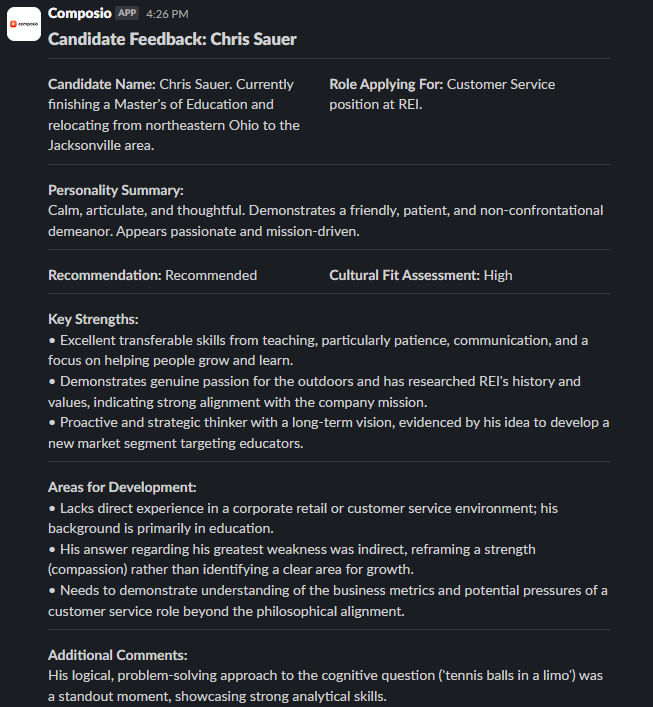

## And… That's a Wrap! 🎉🤝

With that, we’ve created a complete HR sidekick that records interviews, summarizes them intelligently, and instantly shares feedback on Slack.  

Kate no longer needs to juggle notes or risk forgetting key details. Instead, she gets detailed, AI-powered insights delivered right where her team collaborates.  

This is just the beginning — imagine combining this with facial expression analysis, gesture detection, or even emotion recognition to create a 360-degree view of your candidate. The possibilities with VideoDB are endless.  

Go forth, automate, and make your hiring process not just smarter… but truly delightful!
